In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

**First we analyze the trip info output, all csv files are stored in h5 stores for compression and fast retrieval**

In [2]:
store = pd.HDFStore("london_100_oneshot.h5")

In [3]:
if "trip_df" in store:
    tdf = store["trip_df"]
else:
    tdf = pd.read_csv("one_tripinfo.csv",sep=';')
    store["trip_df"] = tdf

In [4]:
tdf[:5]

,tripinfo_arrival,tripinfo_arrivalLane,tripinfo_arrivalPos,tripinfo_arrivalSpeed,tripinfo_depart,tripinfo_departDelay,tripinfo_departLane,tripinfo_departPos,tripinfo_departSpeed,tripinfo_devices,tripinfo_duration,tripinfo_id,tripinfo_rerouteNo,tripinfo_routeLength,tripinfo_timeLoss,tripinfo_vType,tripinfo_vaporized,tripinfo_waitSteps
0,233.0,4260281#0_0,87.14,12.39,72.0,-0.24,173215324#0_0,0.17,0.00,vehroute_28735 tripinfo_28735 routing_28735,161.0,28735,2,1739.76,31.06,DEFAULT_VEHTYPE,NaN,3
1,321.0,7970840#0_1,51.59,6.15,73.0,-0.58,-271816292_1,5.10,13.41,vehroute_6170 tripinfo_6170 routing_6170,248.0,6170,1,2155.28,88.40,DEFAULT_VEHTYPE,NaN,53
2,328.0,14963109_2,281.34,16.83,43.0,1.64,-207984743_0,5.10,4.79,vehroute_3779 tripinfo_3779 routing_3779,285.0,3779,2,4071.14,47.14,DEFAULT_VEHTYPE,NaN,14
3,346.0,-312433747_1,8.98,8.84,66.0,2.82,-98860766#4_0,5.10,10.92,vehroute_1144 tripinfo_1144 routing_1144,280.0,1144,3,2393.83,115.89,DEFAULT_VEHTYPE,NaN,64
4,379.0,4082596#0_1,125.24,12.27,140.0,-0.06,173215324#0_0,0.17,8.39,vehroute_28750 tripinfo_28750 routing_28750,239.0,28750,3,2045.97,87.56,DEFAULT_VEHTYPE,NaN,42


In [5]:
len(tdf)

30191

Let's get trips completed in each half hour

In [6]:
ax1 = tdf.ix[tdf["tripinfo_arrival"] <= 7205,"tripinfo_arrival"].hist(bins=4,alpha=0.6)
ax1.set_title("Trips Completed in each 30 Minutes")
ax1.set_xlabel("Time (Seconds)",fontsize=16)
ax1.set_ylabel("No. of Completed Trips",fontsize=16)
ax1.grid()
ax1.yaxis.grid(True)

In [7]:
plt.savefig("hist_trip_completion.pdf",bbox_inches="tight")

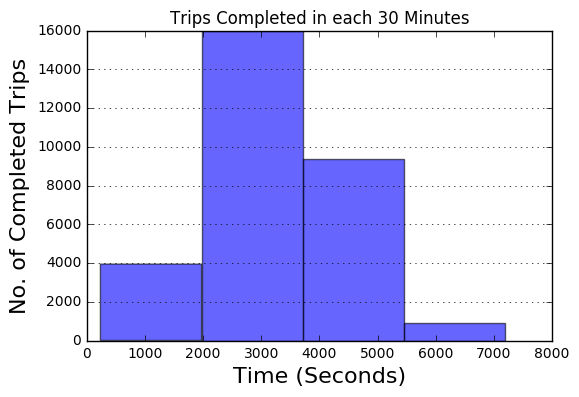

In [8]:
plt.show()

Now let's get distribution of trip duration and add a lognormal to it!

In [9]:
s,loc,scale = st.lognorm.fit(tdf["tripinfo_duration"],loc=0)

In [10]:
#norm1,norm2 = st.norm.fit(tdf["tripinfo_duration"])

In [11]:
#gamma1, gamma2, gamma3 = st.gamma.fit(tdf["tripinfo_duration"])

In [12]:
#beta1, beta2,beta3,beta4 = st.beta.fit(tdf["tripinfo_duration"])

In [13]:
#expon1, expon2  = st.expon.fit(tdf["tripinfo_duration"])

In [87]:
fig = plt.figure()
ax2 = fig.add_subplot(111)
x = np.linspace(0,8000,8000)
ax2.hist(tdf["tripinfo_duration"],bins=20,normed=True,alpha=0.6)
ln = (st.lognorm.pdf(x,s,loc,scale))
#nr = st.norm.pdf(x,norm1,norm2)
#gm = st.gamma.pdf(x,gamma1,gamma2,gamma3)
#bt = st.beta.pdf(x,beta1,beta2,beta3,beta4)
#print [round(x,3) for x in ln[:10]]
ax2.plot(ln,color="r")
#ax.plot(nr,color="y")
#ax.plot(gm,color="g")
#ax.plot(bt,color="m")
ax2.set_xlabel("Trip Duration (Seconds)",fontsize=16)
ax2.set_ylabel("Probability",fontsize=16)
ax2.set_title("Fit of Lognormal Distribution")
ax2.legend(labels=["lognormal fit"])

In [88]:
plt.savefig("lognorm_fit_oneshot_100.pdf",bbox_inches = "tight")

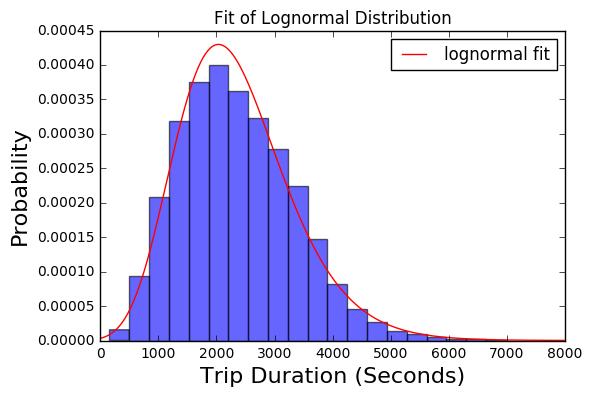

In [89]:
plt.show()

**Now let's check on queue outputs**

In [17]:
if "queue_df" in store:
    qdf = store["queue_df"]
else:
    qdf = pd.read_csv("one_queue.csv",sep=';')
    qdf = qdf.dropna()
    store["queue_df"] = qdf

In [18]:
qdf[qdf.columns[2:]].describe()

,lane_queueing_length,lane_queueing_length_experimental,lane_queueing_time
count,8.131256e+06,8.131256e+06,8.131256e+06
mean,1.319198e+01,1.497476e+01,2.093157e+01
std,1.606208e+01,1.632953e+01,3.334948e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,6.000000e+00,4.000000e+00
50%,6.000000e+00,6.190000e+00,1.200000e+01
75%,1.351000e+01,2.010000e+01,2.600000e+01
max,4.711600e+02,4.754900e+02,7.050000e+02


In [19]:
qdf[:3]

,data_timestep,lane_id,lane_queueing_length,lane_queueing_length_experimental,lane_queueing_time
3,3.0,-312433747_1,5.77,5.77,1.0
4,4.0,-312433747_1,5.77,5.77,2.0
5,4.0,-34150587_0,0.00,14.35,0.0


In [20]:
qdf = qdf[~ qdf["lane_id"].str.contains(":")]

In [21]:
qdf = qdf[qdf["data_timestep"] < 7205]

In [22]:
lane_mean_qdf = qdf[qdf.columns[1:]].groupby("lane_id").mean()

In [23]:
lane_mean_qdf[:3]

,lane_queueing_length,lane_queueing_length_experimental,lane_queueing_time
lane_id,,,
-100076118#0_0,10.530052,11.914767,11.279793
-100306119_0,0.000000,5.230000,0.000000
-100514383#2_0,3.687273,7.565909,1.090909


In [24]:
#import seaborn as sns

In [25]:
#jp = sns.jointplot(x="data_timestep", y="lane_queueing_length", data=qdf, kind="kde", color="m")

In [26]:
def cdf_plot(ser,ax=None,figsize=None, label=None):
    ser = ser.sort_values()
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)
    return ser_cdf.plot(drawstyle='steps',figsize=figsize,yticks=np.arange(0.,1.001,0.1),ax=ax, label=label)

In [27]:
#sns.reset_orig()

In [28]:
camerasdf = pd.read_csv("london_100_cameras_with_closest_edge.csv")

In [29]:
camera_close_edgesdf =(pd.concat([camerasdf["CLOSEST_EDGE_1"],camerasdf["CLOSEST_EDGE_2"],camerasdf["CLOSEST_EDGE_3"]]).drop_duplicates())

In [30]:
qdf["edge_id"] =qdf["lane_id"].str.replace("_[0-9]$","")

In [31]:
qdf_cameras = qdf.merge(camera_close_edgesdf.to_frame("edge_id"))

In [32]:
lane_mean_qdf_cameras = qdf_cameras[qdf_cameras.columns[1:]].groupby("lane_id").mean() 

In [33]:
ax3 = cdf_plot(lane_mean_qdf["lane_queueing_length"])

In [34]:
cdf_plot(lane_mean_qdf_cameras["lane_queueing_length"],ax=ax3)

In [35]:
ax3.set_xlim(0,50)
ax3.set_xlabel("Queue Length (Meters)",fontsize=16)
ax3.set_ylabel("CDF",fontsize=16)
ax3.set_title("CDF of Average Queue Length")
ax3.legend(labels=["Overall","Near Cameras"],loc="best")
ax3.grid()

In [36]:
plt.savefig("cdf_avg_queue_len.pdf",bbox_inches="tight")

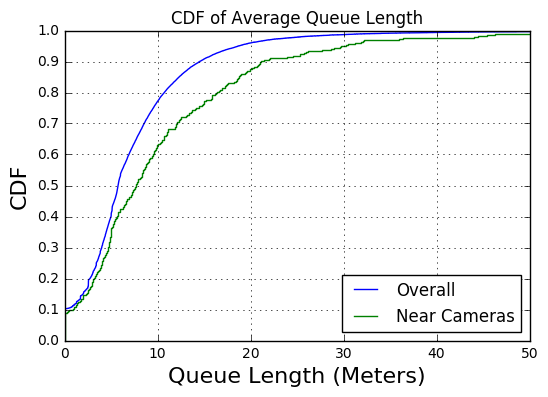

In [37]:
plt.show()

In [38]:
ax4 = cdf_plot(lane_mean_qdf["lane_queueing_time"])

In [39]:
cdf_plot(lane_mean_qdf_cameras["lane_queueing_time"],ax=ax4)

In [40]:
ax4.set_xlim(0,50)
ax4.set_xlabel("Queue Time (Seconds)",fontsize=16)
ax4.set_ylabel("CDF",fontsize=16)
ax4.set_title("CDF of Average Queue Time")
ax4.legend(labels=["Overall","Near Cameras"],loc="best")
ax4.grid()

In [41]:
plt.savefig("cdf_avg_queue_time.pdf",bbox_inches="tight")

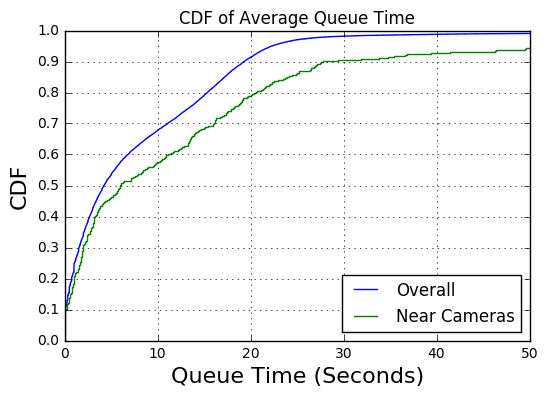

In [42]:
plt.show()

(NOT DOING IT NOW) We can also get the best fit results for distribution of length of the queue.

In [43]:
def analyze_best_fit(lane_groups):
    distributions = [st.expon, st.norm,st.gamma,st.weibull_max,st.weibull_min,st.logistic,st.beta]
    def get_best_fits(data):
        mles = []
        for distribution in distributions:
            pars = distribution.fit(data)
            mle = distribution.nnlf(pars, data)
            mles.append(mle)
        temp = sorted(zip(distributions, mles), key=lambda d: d[1])
        return [name ,temp[0][0].name,temp[1][0].name,temp[2][0].name,temp[3][0].name,temp[4][0].name]

    best_fits = []
    for name,group in lane_groups:
        best_fits.append(get_best_fits(group["lane_queueing_length"]))
    return best_fits

** Now let's have a look at egde info output dump**


http://sumo.dlr.de/wiki/Simulation/Output/Lane-_or_Edge-based_Traffic_Measures

In [44]:
if "edge_df" in store:
    edf = store["edge_df"]
else:
    edf = pd.read_csv("one_edgeinfo.csv",sep=';')
    edf = edf.dropna()
    store["edge_df"] = edf

In [45]:
len(edf.groupby("edge_id"))

77376

In [46]:
edf[:5]

,interval_begin,interval_end,interval_id,edge_arrived,edge_density,edge_departed,edge_entered,edge_id,edge_laneChangedFrom,edge_laneChangedTo,edge_left,edge_occupancy,edge_overlapTraveltime,edge_sampledSeconds,edge_speed,edge_traveltime,edge_waitingTime
0,0.0,60.0,dump_60_60,0,1.57,0,1,-101178818,0,0,1,0.39,7.94,7.94,11.27,7.07,0.0
1,0.0,60.0,dump_60_60,0,3.45,0,1,-101178824,0,0,1,0.86,0.99,0.99,9.85,0.50,0.0
2,0.0,60.0,dump_60_60,0,10.48,4,0,-10494986,4,4,4,2.62,3.85,12.20,6.33,3.00,0.0
3,0.0,60.0,dump_60_60,0,4.19,0,1,-11196974#1,0,0,1,2.09,2.33,2.33,6.12,1.54,0.0
4,0.0,60.0,dump_60_60,0,2.81,0,3,-11196974#2,0,0,2,1.40,8.21,17.00,12.89,7.80,0.0


In [90]:
ax5 = edf["edge_speed"].hist(bins=10,alpha=0.6)

In [91]:
ax5.set_ylabel("Frequency",fontsize=16)
ax5.set_xlabel("Speed (Meters/S)",fontsize=16)
ax5.set_title("Histogram of speed distribution")
ax5.grid()

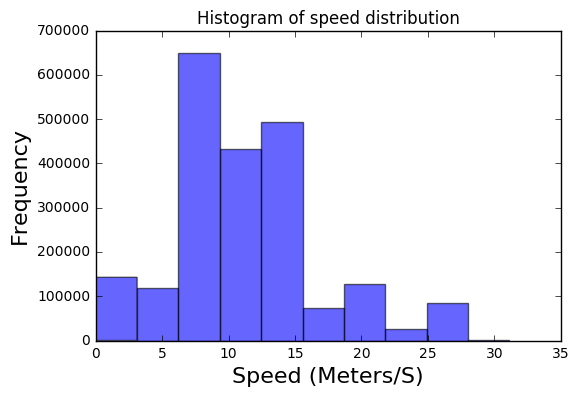

In [92]:
plt.savefig("hist_speed.pdf",bbox_inches="tight")
plt.show()

In [50]:
#import sumolib

In [51]:
#mynet = sumolib.net.readNet(r"C:\Users\Roozbeh\Sumo\London\london.net.xml")

In [52]:
#len(mynet.getEdges())

In [53]:
edf_cameras = edf.merge(camera_close_edgesdf.to_frame("edge_id"),on="edge_id")

**REMEMBER TO USE THIS**
Average number of vehicles on the edge (#) = sampledSeconds / period

In [54]:
edf["edge_density"] = edf["edge_density"].astype(str).str.extract( "([0-9\.]+)" ,expand=False).astype(np.float)

In [55]:
#assuming 2meters for length of  car it doesn't make much sense to have more than 500 cars in a km!
#edf = edf[edf["edge_density"] <= 500]
#edf_cameras = edf_cameras[edf_cameras["edge_density"]<=500]

In [56]:
ax6 = cdf_plot(edf["edge_density"])

In [57]:
cdf_plot(edf_cameras["edge_density"],ax=ax6)

In [58]:
ax6.set_xlim((0,100))
ax6.set_xlabel("Edge Density (Veh/KM)",fontsize=16)
ax6.set_ylabel("CDF",fontsize=16)
ax6.set_title("CDF of Overall Edge Densities")
ax6.legend(labels=["Overall","Near Cameras"],loc="best")
ax6.grid()

In [59]:
plt.savefig("cdf_edge_density.pdf",bbox_inches="tight")

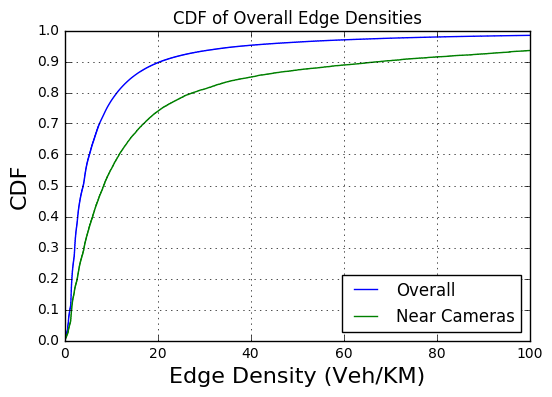

In [60]:
plt.show()

In [61]:
#edf["edge_occupancy"] = edf["edge_occupancy"].astype(str).str.extract( "([0-9\.]+)" ,expand=False).astype(np.float)

In [62]:
#ax7 = cdf_plot(edf["edge_occupancy"])

In [63]:
#ax7.set_xlim((0,100))
#ax7.set_xlabel("Edge Occupancy (%)",fontsize=16)
#ax7.set_ylabel("CDF",fontsize=16)
#ax7.set_title("CDF of Overal Edge Occupancies")
#ax7.grid()

In [64]:
#plt.savefig("cdf_edge_occ.pdf",bbox_inches="tight")

In [65]:
#plt.show()

In [66]:
edf["car_count"] = edf["edge_entered"] + edf["edge_departed"] + edf["edge_laneChangedTo"]

In [67]:
edf_cameras["car_count"] = edf_cameras["edge_entered"] + edf_cameras["edge_departed"] + edf_cameras["edge_laneChangedTo"]

In [68]:
edf.ix[(edf["car_count"]<40) & (edf["car_count"]!=0),"car_count"].hist(bins=20)

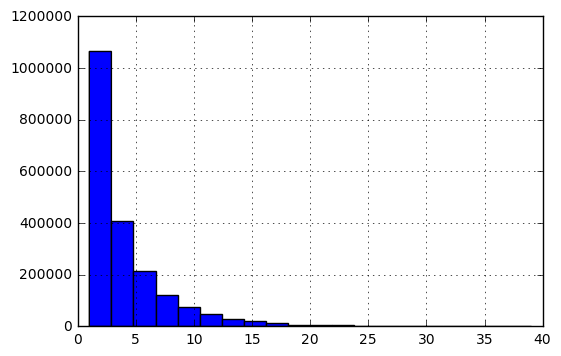

In [69]:
plt.show()

In [103]:
ax8 = cdf_plot(edf["car_count"])

In [104]:
cdf_plot(edf_cameras["car_count"],ax=ax8)

In [105]:
ax8.set_xlabel("No. of Vehicles in a Minute",fontsize=16)
ax8.set_ylabel("CDF",fontsize=16)
ax8.set_title("CDF of overall per minute vehicles")
ax8.legend(labels=["Overall","Near Cameras"],loc="lower right")
ax8.grid()

In [106]:
plt.savefig("cdf_car_count.pdf",bbox_inches="tight")

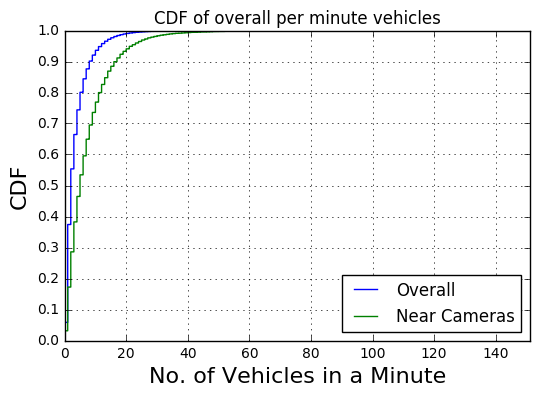

In [107]:
plt.show()

In [75]:
import seaborn as sns

In [76]:
sns.reset_orig()

In [77]:
from tqdm import tqdm_notebook

In [78]:
ax9 = cdf_plot(edf[["edge_id","car_count"]].groupby("edge_id").size())

In [79]:
ax9.set_xlim(0,120)
ax9.set_xlabel("Size of edge groups",fontsize=16)
ax9.set_ylabel("CDF",fontsize=16)
ax9.set_title("CDF of count of minutes a group has at least one vehicle")

In [80]:
plt.savefig("cdf_edge_group_sizes.pdf",bbox_inches="tight")

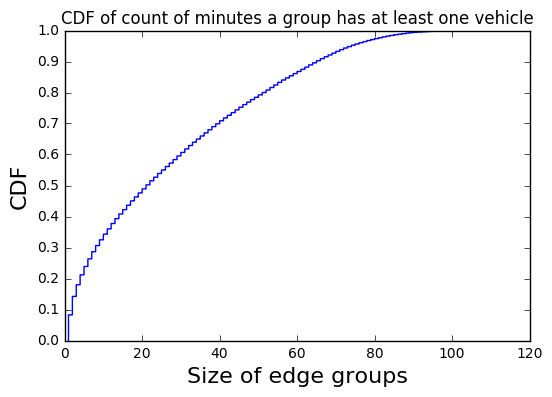

In [81]:
plt.show()

In [82]:
edf[["edge_id","car_count"]].to_csv("total_veh_per_edge.csv",index=False)

USE THE SAVED CSV FOR BEST FIT ANALYSIS

In [94]:
#ax10 = sns.distplot(edf["car_count"],bins=32,kde_kws ={ "bw" : 1.5 , "color" : "red"})
#ax10 = sns.distplot(edf["car_count"],bins=32,kde=False)
ax10 = sns.distplot(edf_cameras["car_count"],bins=32,hist_kws={"alpha":0.6},fit=st.expon,kde=False,fit_kws={"color":"red","label":"exponential fit"})

In [95]:
ax10.set_xlim(0,100)
ax10.set_xlabel("Number of cars",fontsize=16)
ax10.set_ylabel("Normed frequency",fontsize=16)
ax10.set_title("Density of per minute vehicle near cameras")
ax10.legend(loc='best')

In [96]:
plt.savefig("density_total_car_count.pdf",bbox_inches="tight")

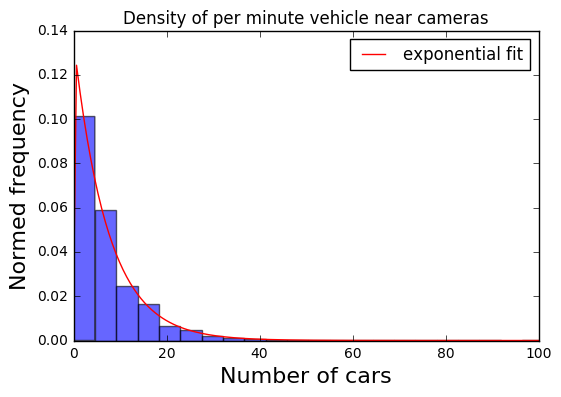

In [97]:
plt.show()